> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction

The dataset used contains information on movies production from 1960 to 2015. Various areas were considered in the dataset which includes areas such as popularity, revenue, vote, genre, director, cast, budget, etc.

The aim of this analysis is to evaluate the dataset, see the interactions and how they affect each other. The result to be obtained would be useful in deducing areas of improvement and movie trend. As a movie lover, this would be really interesting to work on.

# Questions this analysis would answer

1. Total number of movies released yearly
2. Effect of number of movies generated in a year on total revenue
3. Effect of popularity on revenue generated
4. Effect of cost(budget) on runtime
5. Did movies increase in popularity as the year went by?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [90]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


## Data Wrangling

In [2]:
df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [111]:
df_movies.shape

(10866, 21)

In [3]:
df_movies.isnull().sum()
# Null values are more in the string datatypes. However, columns like homepage and production companies would be dropped as do not have direct impact on the analysis to be made

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [4]:
df_movies.duplicated().sum()
# Result shows only one complete row duplicated data, therefore, it would be dropped in the next section

1

## Data Cleaning

In [5]:
# Based on the analysis to be made some columns are not needed and so would be dropped 
df_movies.drop(columns = ['homepage','imdb_id', 'tagline', 'cast', 'overview','keywords','production_companies'], axis = 1, inplace = True)

In [6]:
# Checking to see null values after columns have been dropped
df_movies.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [7]:
# Checked for null and since the areas where the nulls are do not affect the analysis, they are dropped
df_movies = df_movies.dropna(axis = 0, how = 'any')

In [8]:
# Confirming if there are any null values left
df_movies.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [9]:
# Ensuring uniformity of data format
df_movies['release_date']=pd.to_datetime(df_movies['release_date'],format='%m/%d/%y')


# Exploratory Data Analysis

## What is the total number of movies released yearly?

<function matplotlib.pyplot.show(*args, **kw)>

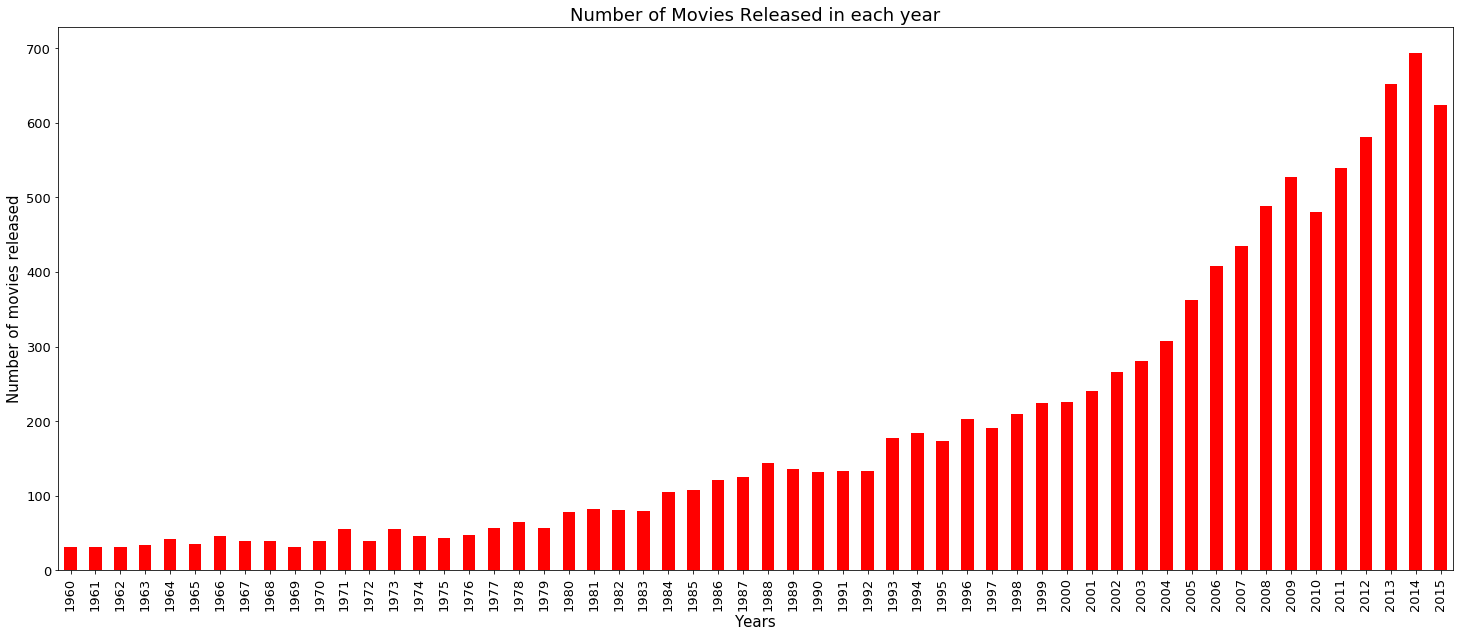

In [10]:
Fig1 = plt.figure(figsize = (25, 10))
df_movies.groupby('release_year').count()['id'].plot(kind = 'bar', fontsize = 13, color = '#ff0000')
plt.title('Number of Movies Released in each year', fontsize = 18)
plt.xlabel('Years', fontsize = 15)
plt.ylabel('Number of movies released', fontsize = 15)
plt.show

The graph shows the total number of movies released by year with the highest number of movies released in 2014 and 2013 coming in second place.

## Does the number of movies released in a year affect the revenue generated?

In [11]:
def releaseYear(mode="", title="", yLabel= "", n=13):
    Fig2 = plt.figure(figsize = (25, 10))
    df_movies.groupby(['release_year']).mean()[mode].plot(kind = 'bar', fontsize = n, color = '#ff0000' )
    plt.title(title, fontsize = (n+5))
    plt.xlabel('Release Year', fontsize = n)
    plt.ylabel(yLabel, fontsize = n)
    plt.show

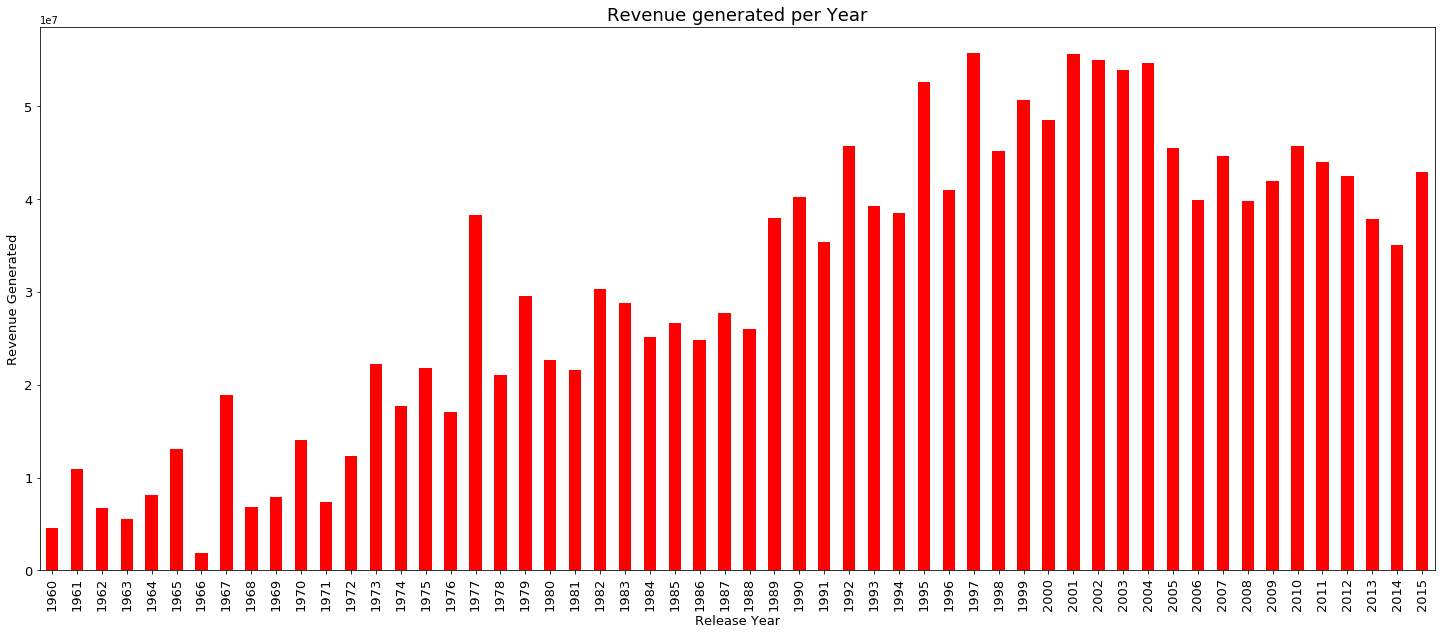

In [12]:
releaseYear('revenue', title='Revenue generated per Year', yLabel='Revenue Generated')

A function was defined here to plot this graph to avoid repetition of code if a similar graph is plotted. The graph shows the total amount of revenue generated in the different years.

## Is the revenue generated influenced by the popularity?

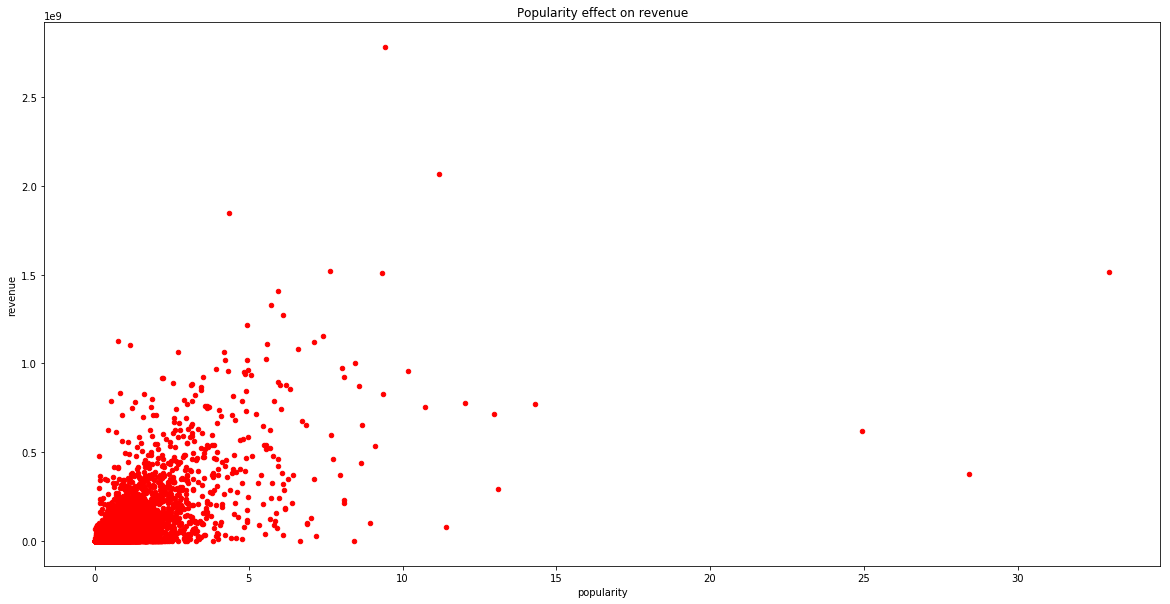

In [13]:
df_movies.plot(x = 'popularity', y = 'revenue', title = 'Popularity effect on revenue', kind = 'scatter', color = '#ff0000', figsize = (20,10));

Due to the large amount of unique variables, the scatter plot was used to show the relationship between popularity and revenue generated.

## Is cost a factor that determines runtime?

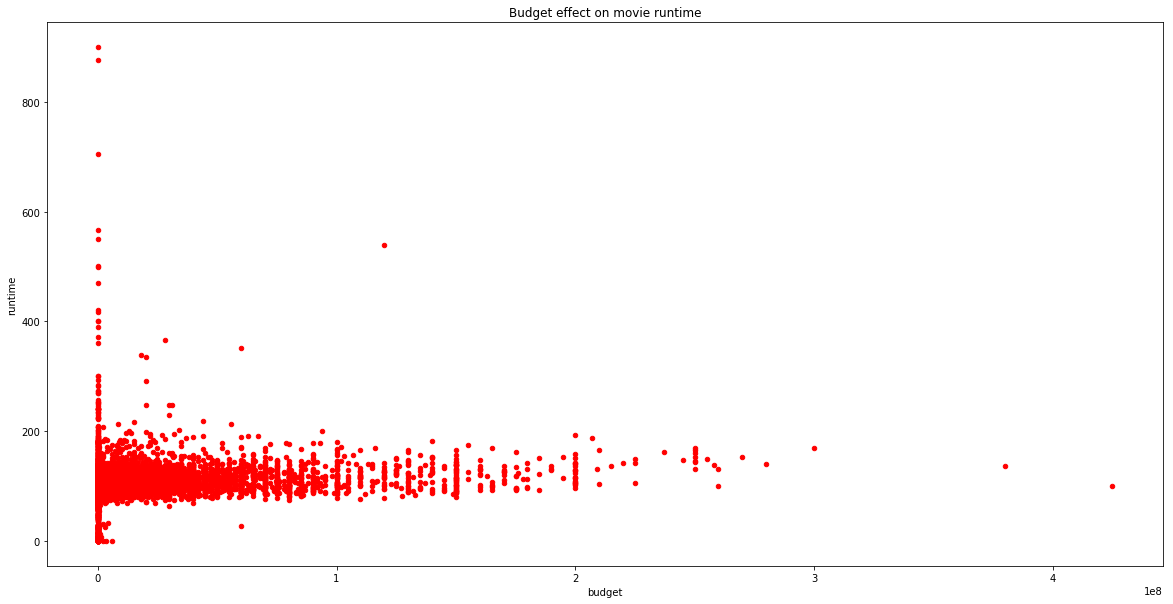

In [14]:
df_movies.plot(x = 'budget', y = 'runtime', title = 'Budget effect on movie runtime', kind = 'scatter', color = '#ff0000', figsize = (20, 10));

This scatter plot shows the relationship between budget allocated to each movie and the runtime. However, there was no correlation, just few outliers.

## Did movies become more popular?

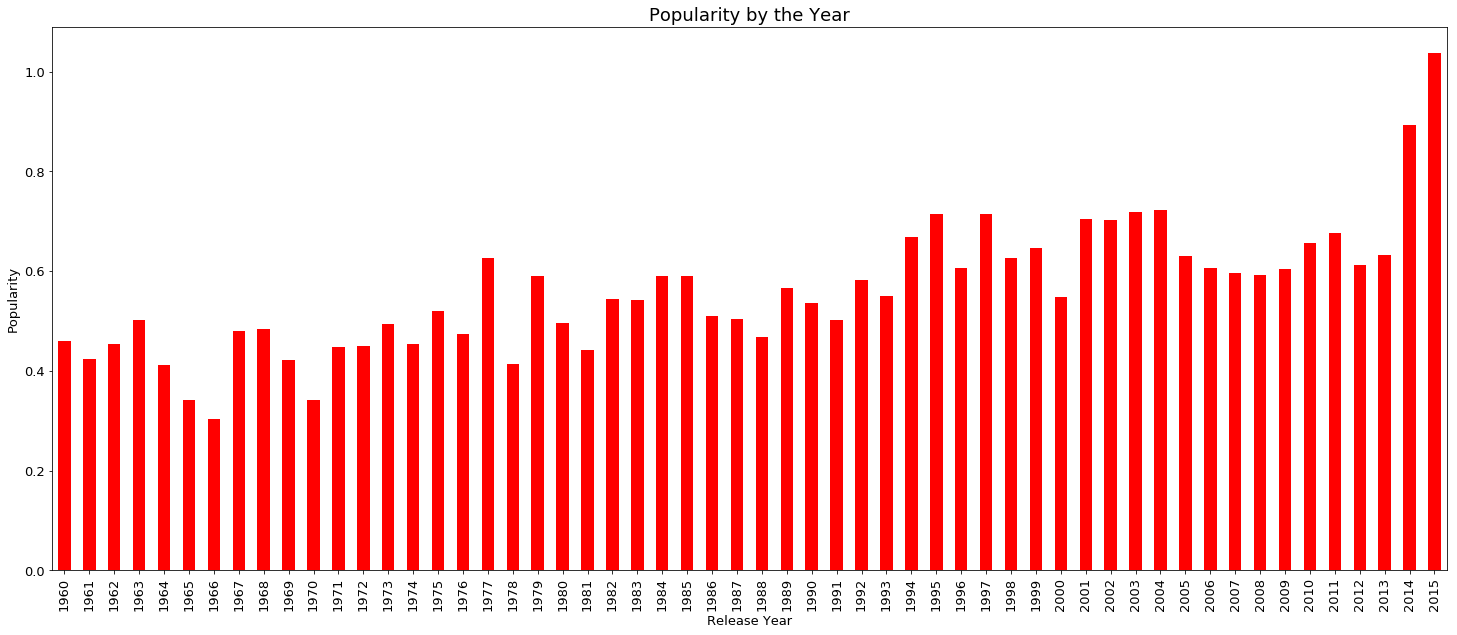

In [15]:
releaseYear(mode='popularity', title='Popularity by the Year', yLabel='Popularity')

The function defined in the second plot was called here, in other to prevent repeated codes. However the y-axis is different. This plot shows how movies popularity evolved along the various years.

# Conclusions

## From the analysis carried out, the following conclusions was made;

1. The highest number of movies were released in 2014 and since 1960, there has been a increase in movies released over the years.
2. Number of movies generated in a year has a slight direct proportionality with the amount of revenue generated in that year.
3. Popularity seems to have a positive impact on revenue. 
4. Budget or cost however, does not have an effect on the run time of a movie.
5. It could be seen that popularity over years increased gradually until a spike in 2014.

One limitation is I wanted to group popularity and runtime to get the effect on revenue, but I could not seen to get it right. A pointer in the right direction would go a long way.
Also, further research would be useful in understanding why there was a sudden spike in popularity from 2014.

In [16]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0